# Introduction to Tensorflow

### Exercise 1: Create Tensors with `tf.constant`

In [ ]:
import tensorflow as tf
import numpy as np

scalar = tf.constant(5)                     # 0D (shape: [])
print("Scalar tf.constant:",scalar)

vector = tf.constant([1, 2, 3])             # 1D (shape: [3])
print("Vector tf.constant:",vector)

matrix = tf.constant([[1, 2], [3, 4]])      # 2D (shape: [2, 2])
print("Matrix tf.constant:",matrix)

Scalar tf.constant: tf.Tensor(5, shape=(), dtype=int32)
Vector tf.constant: tf.Tensor([1 2 3], shape=(3,), dtype=int32)
Matrix tf.constant: tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)


### Exercise 2: Create Tensors with `tf.zeros`




In [ ]:
zeros_3x3 = tf.zeros([3, 3])                # 3x3 zero matrix
print("Zeros tf.zeros:",zeros_3x3)

ones_2x3x4 = tf.ones([2, 3, 4])             # 3D tensor
print("Ones tf.ones:",ones_2x3x4)

Zeros tf.zeros: tf.Tensor(
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]], shape=(3, 3), dtype=float32)
Ones tf.ones: tf.Tensor(
[[[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]], shape=(2, 3, 4), dtype=float32)


### Exercise 3: Create Tensors with `tf.random`

In [ ]:
random_uniform = tf.random.uniform([2, 2])   # Values between 0-1
print("Uniform tf.random:",random_uniform)

random_normal = tf.random.normal([3, 3])     # Normal distribution
print("Normal tf.random:",random_normal)

Uniform tf.random: tf.Tensor(
[[0.6089585  0.33360052]
 [0.5723891  0.77952397]], shape=(2, 2), dtype=float32)
Normal tf.random: tf.Tensor(
[[ 0.28232023 -0.96896833  0.71223307]
 [-1.596908   -0.9339247   0.1981365 ]
 [ 0.8579382  -0.93375    -0.30809504]], shape=(3, 3), dtype=float32)


### Practice 1

Try creating:

* A 4D zeros tensor (e.g., for batches of images)

* A 1D tensor with values from 10 to 20

### Exercise 4: Tensor Attributes - Check Attributes

In [ ]:
tensor = tf.constant([[1., 2.], [3., 4.]])
print("Shape:", tensor.shape)        # Output: (2, 2)
print("Data type:", tensor.dtype)    # Output: <dtype: 'float32'>
print("Rank:", tensor.ndim)          # Output: 2

Shape: (2, 2)
Data type: <dtype: 'float32'>
Rank: 2


### Exercise 5: Tensor Attributes - Change dtype

In [ ]:
int_tensor = tf.constant([1, 2], dtype=tf.int32)
print("Original data type:", int_tensor.dtype)  # Output: <dtype: 'int32'>

float_tensor = tf.cast(int_tensor, tf.float32)
print("Changed data type:", float_tensor.dtype)  # Output: <dtype: 'float32'>

Original data type: <dtype: 'int32'>
Changed data type: <dtype: 'float32'>


### Practice 2:

* Create a boolean tensor and check its dtype

* Find the rank of `tf.ones([5, 3, 2])`

### Exercise 6: Numpy ↔ Tensor Conversion

Practice converting data between NumPy and TensorFlow formats.


In [ ]:
# 6A. Numpy to Tensor
np_array = np.array([[1, 2], [3, 4]])
print("Numpy array:", np_array)

tensor = tf.constant(np_array)       # or tf.convert_to_tensor(np_array)
print("Tensor:", tensor)

# 6B. Tensor to Numpy
back_to_np = tensor.numpy()
print("Numpy array from tensor:", back_to_np)

Numpy array: [[1 2]
 [3 4]]
Tensor: tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int64)
Numpy array from tensor: [[1 2]
 [3 4]]


### Practice 3

* Convert a random NumPy array to tensor, then back to NumPy

* Check if modifications in NumPy affect the original tensor

### Practice 4

4.1 Create a batch of 10 grayscale images (4D tensor)

4.2 Normalize the batch

### Exercise 7: Real-World Application

#### Objective: Simulate image preprocessing

In [ ]:
# Simulate RGB image (3D tensor)
fake_image = tf.random.uniform([224, 224, 3], maxval=255, dtype=tf.int32)

# 7A. Check properties
print("Image shape:", fake_image.shape)  # Should be (224, 224, 3)

# 7B. Normalize to [0, 1]
normalized = tf.cast(fake_image, tf.float32) / 255.0

Image shape: (224, 224, 3)


**Important point**

If original tensor is `int`, normalization fails, So we converted to `float32` before normalizing

### Practice 5

Debugging Challenge - Will it work

```
# Broken code - fix it!
try:
    tensor = tf.constant([1, 2, 3], dtype=tf.float16)
    summed = tensor + 50  # Will this work?
except Exception as e:
    print("Error:", e)    # Hint: Check dtypes!
```

### Assessment - 1
Create a tensor representing:

* A 5x5 identity matrix (use `tf.eye`)

* Black RGB image (300×200 pixels)

What’s the output of:

```
tf.ones([2, 2]).dtype == tf.zeros([3]).dtype
```

### Assessment - 2

Task: Create a 2x2 tensor with random values, check if each value is greater than 0.5, and count how many are.

# Tensor Operations & Broadcasting

### Exercise 1: Basic Arithmetic Operations
#### Objective:
Perform element-wise and matrix operations.

```
# Given tensors
A = tf.constant([[1, 2], [3, 4]])  # Shape (2, 2)
B = tf.constant([[5, 6], [7, 8]])  # Shape (2, 2)
C = tf.constant([10, 20])          # Shape (2,)

# Tasks:
# 1. Element-wise addition (A + B)
# 2. Element-wise multiplication (A * B)
# 3. Matrix multiplication (A @ B)
# 4. Add C to A (broadcasting)
```

In [ ]:
import tensorflow as tf
A = tf.constant([[1, 2], [3, 4]])  # Shape (2, 2)
B = tf.constant([[5, 6], [7, 8]])  # Shape (2, 2)
C = tf.constant([10, 20])          # Shape (2,)

print("A :",A)
print("B :",B)
print("C :",C)
print("A+C :",A+C)

A : tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)
B : tf.Tensor(
[[5 6]
 [7 8]], shape=(2, 2), dtype=int32)
C : tf.Tensor([10 20], shape=(2,), dtype=int32)
A+C : tf.Tensor(
[[11 22]
 [13 24]], shape=(2, 2), dtype=int32)


### Exercise 2: Reshaping & Broadcasting
#### Objective
Manipulate tensor shapes and observe broadcasting.

```
# Given tensor
D = tf.constant([[1], [2], [3]])  # Shape (3, 1)
E = tf.constant([4, 5, 6])        # Shape (3,)

# Tasks:
# 1. Reshape D to (1, 3)
# 2. Add D and E (broadcasting)
# 3. Reshape E to (3, 1) and multiply with D
```

### Exercise 3: Tensor Manipulation Functions
#### Objective:
Write reusable functions for tensor operations.

```
# Test cases:
F = tf.constant([[0, 10], [20, 30]])  # Shape (2, 2)
G = tf.constant([5])                   # Shape (1,)
```

* Task 1: Write a function to normalize a tensor (min-max scaling)
* Task 2: Write a function to apply broadcasting addition

### Exercise 4: Debugging Challenge
#### Objective: Fix shape-related errors.

```
# Broken code (fix the shapes!)
H = tf.constant([[1, 2]])  # Shape (1, 2)
I = tf.constant([[3], [4]]) # Shape (2, 1)

# Task: Make this work
J = H + I
```

### Exercise 5: Real-World Application

#### Objective: Simulate image preprocessing

```
# Simulate a batch of 3 grayscale images (28x28 pixels)
images = tf.random.uniform([3, 28, 28], maxval=255, dtype=tf.float32)

```
#### Tasks:
1. Normalize pixels to [0, 1]
2. Add a batch of 3 different bias values ([0.1, 0.2, 0.3]) to each image

# Tensor Slicing, Indexing, and Reshaping



### Exercise 1: Slicing & Updating Tensors

#### Objective:
Manipulate image-like tensors (e.g., (height, width, channels)).

**Task 1.1: Extract Patches from an Image**

* Simulate a 5x5 RGB image (shape: [5, 5, 3])
* Extract top-left 2x2 patch





### Exercise 2: Dimensionality Manipulation

#### Objective: Reshape and transpose image batches.

**Task 2.1: Flatten an Image Batch**

* Create a Batch of 4 grayscale images (shape: [4, 28, 28])
* Flatten to [4, 784]

**Task 2.2: Swap Color Channels (RGB → BGR)**

* Simulate an RGB image (shape: [224, 224, 3])
* Swap channels using tf.reverse


### Exercise 3: Real-World Tensor Operations (solved)

#### Objective: Use CIFAR-10 data (32x32 RGB images).

**Task 3.1: Normalize and Crop**




In [ ]:
# Load CIFAR-10 (or simulate)
(x_train, _), _ = tf.keras.datasets.cifar10.load_data()
image = x_train[0]  # Shape: [32, 32, 3]

# Normalize to [0, 1] and crop center 16x16
normalized = tf.cast(image, tf.float32) / 255.0
cropped = normalized[8:24, 8:24, :]  # Center crop

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


**Task 3.2: Mask Pixels**

In [ ]:
# Create a circular mask
h, w = 32, 32
y, x = tf.meshgrid(tf.range(h), tf.range(w))
center = (h//2, w//2)
mask = ((x - center[0])**2 + (y - center[1])**2) < (h//2)**2  # Circle
masked_image = tf.where(mask[..., tf.newaxis], image, 0)  # Apply mask

### Exercise 4: Debugging Challenge

#### Objective: Fix shape mismatches.

**Task 4.1: Fix Broadcasting Error**

```
# Broken code (shapes: [3, 32, 32, 1] + [3])
batch_images = tf.random.uniform([3, 32, 32, 1])  # Grayscale batch
biases = tf.constant([0.1, 0.2, 0.3])  # Shape [3]
```

# Variables and Gradient Tape

### Exercise 1: Working with tf.Variable
#### Objective: Create and update trainable parameters.

* Variables persist across training loops

* Use `.assign()` for updates (direct assignment won't work!)

In [ ]:
import tensorflow as tf

# 1.1 Create a variable
x = tf.Variable(3.0, name="my_variable")
print("Initial value:", x.numpy())

# 1.2 Update value (using assign)
x.assign(5.0)  # x → 5.0
print("After assignment:", x.numpy())

# 1.3 Increment operation
x.assign_add(2.0)  # x → 7.0
print("After increment:", x.numpy())

Initial value: 3.0
After assignment: 5.0
After increment: 7.0


### Exercise 2: Gradient Descent Step
#### Objective: Minimize $y=(x-4)^2$ using gradient descent.




In [ ]:
# 2.1 Initialize variable
x = tf.Variable(0.0)  # Start at x=0

# 2.2 Gradient descent loop
learning_rate = 0.1
for epoch in range(5):
    with tf.GradientTape() as tape:
        y = (x - 4)**2  # Loss function

    # Compute gradient and update
    grad = tape.gradient(y, x)
    x.assign_sub(learning_rate * grad)  # x -= lr*grad

    print(f"Epoch {epoch}: x={x.numpy():.2f}, grad={grad.numpy():.2f}")

Epoch 0: x=0.80, grad=-8.00
Epoch 1: x=1.44, grad=-6.40
Epoch 2: x=1.95, grad=-5.12
Epoch 3: x=2.36, grad=-4.10
Epoch 4: x=2.69, grad=-3.28


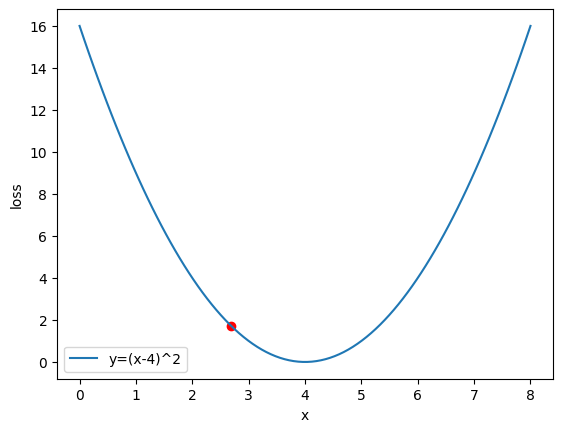

In [ ]:
# Visalize the loss landscape and optimization path:

import matplotlib.pyplot as plt
xs = tf.linspace(0.0, 8.0, 100)
plt.plot(xs, (xs-4)**2, label="y=(x-4)^2")
plt.scatter(x.numpy(), (x-4)**2, c='red')  # Current position
plt.xlabel("x"); plt.ylabel("loss"); plt.legend()

### Exercise 3: Visualizing Gradient Flow
#### Objective: See how gradients propagate through operations.

In [ ]:
# 3.1 Define computation graph
a = tf.Variable(2.0)
b = tf.Variable(3.0)
with tf.GradientTape(persistent=True) as tape:
    c = a * b       # c = 6
    d = c + b       # d = 9
    e = d ** 2      # e = 81

# 3.2 Trace gradients
print("∂e/∂d:", tape.gradient(e, d).numpy())  # 2*d → 18
print("∂e/∂a:", tape.gradient(e, a).numpy())  # ∂e/∂d * ∂d/∂c * ∂c/∂a → 18*1*b → 54

∂e/∂d: 18.0
∂e/∂a: 54.0


# TensorFlow Functions and Graphs

### Exercise 1: Basic @tf.function Usage

#### Objective: Compare eager execution vs graph execution speeds.

In [ ]:
import tensorflow as tf
import timeit

# 1.1 Define a simple computation
def compute(x):
    return tf.reduce_sum(x ** 2)  # Sum of squares

# 1.2 Create TensorFlow graph version
@tf.function
def compute_graph(x):
    return tf.reduce_sum(x ** 2)

# 1.3 Test with large input
x = tf.random.normal([10000, 10000])

# Time both versions
print("Eager time:", timeit.timeit(lambda: compute(x), number=10))
print("Graph time:", timeit.timeit(lambda: compute_graph(x), number=10))

Eager time: 27.054117470999998
Graph time: 2.3716010899999986


### Exercise 2: Profiling with tf.profiler
#### Objective: Analyze performance bottlenecks.

This code should be executed in local machine. TO access localhost in Google Colab you need to create a tunnel from you machine to internet using `ngrok` which is out of scope for this exercise. Hence please execute this code on local machine in Jupyter Notebook only

In [ ]:
# 2.1 Profile the graph function
def profile_computation():
    with tf.profiler.experimental.Profile('logs'):
        for _ in range(10):
            compute_graph(x)

# 2.2 Run profiling
profile_computation()

# 2.3 View results in TensorBoard
!tensorboard --logdir logs  # Run in terminal

2025-04-24 13:04:05.431078: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745499845.455240     947 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745499845.462201     947 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-24 13:04:10.948288: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)

NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

Serving TensorBoard on localhost; to expose to the network, u

### Exercise 3: Real-World Model Comparison (Optional)
#### Objective: Profile a neural network training loop.



```
# This is formatted as code
```

This code is for the students who understands Neural Networks. If student has not studied the Neural Network concepts, he/she may skip it.

In [ ]:
import tensorflow as tf
import timeit

# 1. Define a simple model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10)
])

# 2. Define your own optimizer (since we're doing manual training)
optimizer = tf.keras.optimizers.Adam()

# 3. Training step (you can add/remove @tf.function to compare speed)
@tf.function  # Comment this to try eager execution
def train_step(x, y):
    with tf.GradientTape() as tape:
        logits = model(x)
        loss = tf.reduce_mean(tf.keras.losses.sparse_categorical_crossentropy(y, logits, from_logits=True))
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    return loss

# 4. Create random data to simulate inputs and labels
data = tf.random.uniform([256, 784]), tf.random.uniform([256], maxval=10, dtype=tf.int32)

# 5. Benchmark
print("Time per step:", timeit.timeit(lambda: train_step(*data), number=50))

Time per step: 2.09289868999997
